In [1]:
# This script is for RF, all variables
# Take Dataset3 BUF for example

In [2]:
# Packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X_complete_test_passed = pd.read_csv("../Data/01 Processed Dataset/Complete_BUF.csv") #input
X_complete_test_passed1 = X_complete_test_passed.set_index('GEOID')
y = X_complete_test_passed1.pop('obesity_cr')

In [4]:
X_complete_test_passed1.head()

,% Black,% Ame Indi and AK Native,% Asian,% Nati Hawa and Paci Island,% Hispanic or Latino,% male,% married,% age 18-29,% age 30-39,% age 40-49,...,% unemployment,% below poverty line,% food stamp/SNAP,median value units built,median year units built,% renter-occupied housing units,population density,fafood,fitness,park
GEOID,,,,,,,,,,,,,,,,,,,,,
36029000500,0.062950,0.000000,0.000000,0.0,0.153477,0.432854,0.361005,0.118106,0.126499,0.083933,...,0.063401,0.414311,0.331218,50800,1939,0.376904,266.853532,0.243330,0.218783,0.561366
36029000700,0.004076,0.000000,0.007337,0.0,0.029076,0.454891,0.472657,0.165761,0.135870,0.111685,...,0.047530,0.062044,0.100134,125300,1944,0.242323,3437.581736,0.421502,0.413855,0.769681
36029000900,0.005390,0.000000,0.005390,0.0,0.180763,0.484245,0.391390,0.207711,0.227612,0.093284,...,0.078431,0.097015,0.135734,93000,1939,0.445060,4384.936326,0.288562,0.307975,0.621196
36029001000,0.092095,0.034719,0.016137,0.0,0.055094,0.515729,0.427102,0.193154,0.168867,0.082967,...,0.081107,0.207792,0.317936,79400,1939,0.520183,2932.488101,0.362364,0.232738,0.713865
36029001100,0.057063,0.015310,0.032359,0.0,0.105428,0.525052,0.324919,0.186152,0.134308,0.092206,...,0.071886,0.213184,0.239050,74300,1939,0.543430,1885.467988,0.342703,0.188468,0.791351


In [5]:
y.head()

GEOID
36029000500    38.6
36029000700    27.7
36029000900    30.8
36029001000    32.4
36029001100    33.4
Name: obesity_cr, dtype: float64

In [6]:
len(X_complete_test_passed1),len(X_complete_test_passed1.columns), len(y)

(77, 24, 77)

In [7]:
def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

In [8]:
# feature importance table
df_complete_feaimp = pd.DataFrame({'feature':X_complete_test_passed1.columns}).set_index('feature')

In [9]:
y_rf_complete_predict = []
y_true = []

ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)

fold_index = 0

avg_r_squared = 0

for train_index, test_index in ten_fold.split(X_complete_test_passed1):
    print("TEST:", test_index)
    fold_index += 1

    X_train, X_test = X_complete_test_passed1.iloc[train_index], X_complete_test_passed1.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    training_stat = X_train.describe().transpose()
    scaled_X_train = standarize_data(X_train, training_stat)
    scaled_X_test = standarize_data(X_test, training_stat)

    rf = RandomForestRegressor(bootstrap=False, n_estimators=160, max_features='sqrt', random_state=42) # input
    rf.fit(scaled_X_train, y_train)
    
    ## record feature importance
    df_complete_feaimp['fold_'+str(fold_index)] = rf.feature_importances_
    ## finish recording feature importance

    this_y_predict = rf.predict(scaled_X_test).flatten()

    y_rf_complete_predict = y_rf_complete_predict + this_y_predict.tolist()
    y_true = y_true + y_test.tolist()
    
    avg_r_squared += r2_score(y_test, this_y_predict)

TEST: [ 0  4 10 35 45 47 53 66]
TEST: [12 18 28 33 50 58 68 74]
TEST: [ 5  9 16 22 30 34 39 40]
TEST: [ 7 31 44 49 54 62 65 73]
TEST: [ 3 13 19 25 42 55 64 76]
TEST: [ 6  8 17 36 38 56 61 70]
TEST: [15 24 26 27 41 46 48 75]
TEST: [11 32 43 57 59 69 72]
TEST: [ 1 21 29 37 52 63 67]
TEST: [ 2 14 20 23 51 60 71]


In [10]:
rf_complete_rmse = mean_squared_error(y_true , y_rf_complete_predict, squared=False)
rf_complete_r2 = r2_score(y_true, y_rf_complete_predict)
avg_r_squared = avg_r_squared/10

In [11]:
print("RMSE of the RF model with sociodemographic + diet and physical avtivity visit predictors: "+str(rf_complete_rmse))
print("R2 of the RF model with sociodemographic + diet and physical avtivity visit predictors: "+str(rf_complete_r2)) # For R2, I took this one.
print("R2 of the RF model with sociodemographic + diet and physical avtivity visit predictors (avg): "+str(avg_r_squared))

RMSE of the RF model with sociodemographic + diet and physical avtivity visit predictors: 2.477965304135307
R2 of the RF model with sociodemographic + diet and physical avtivity visit predictors: 0.8730665397274996
R2 of the RF model with sociodemographic + diet and physical avtivity visit predictors (avg): 0.8587122941648702


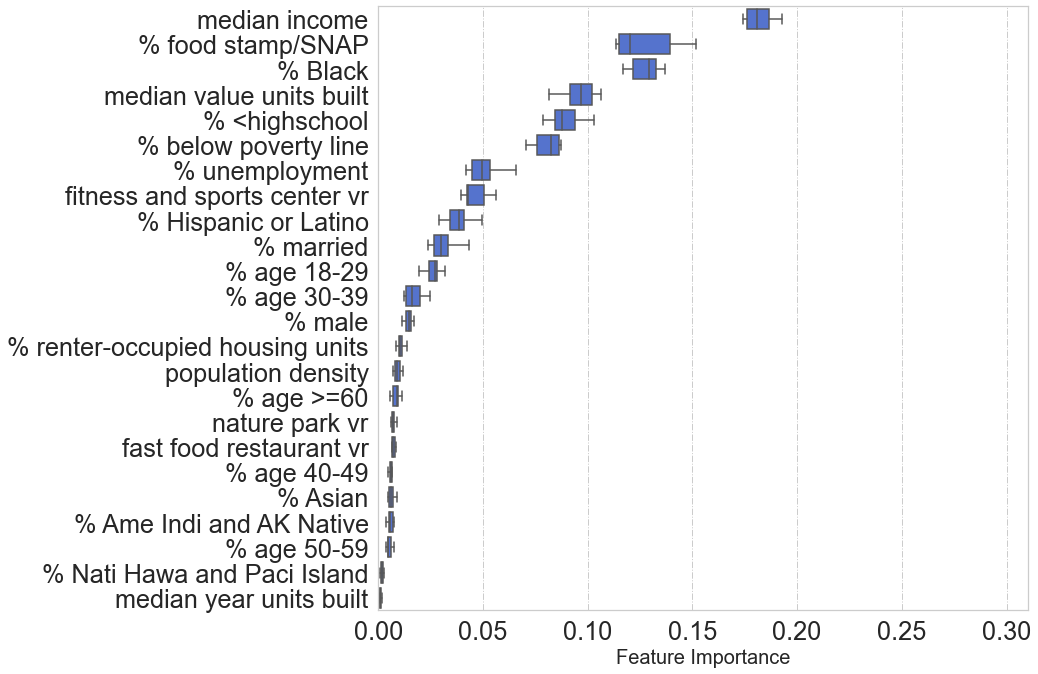

In [12]:
# Feature importance Sns visualization (boxplot, I will not use this one, I will use below one)
df_complete_feaimp = df_complete_feaimp.rename(index={'fitness':'fitness and sports center vr', 'park':'nature park vr', 'fafood':'fast food restaurant vr'}) 

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid",font_scale = 2.3)

df_complete_feaimp_box = df_complete_feaimp.T
index_sort = df_complete_feaimp_box.mean().sort_values(ascending=False).index
df_complete_feaimp_box = df_complete_feaimp_box[index_sort]

ax = sns.boxplot(data=df_complete_feaimp_box, orient='h', showfliers = False, color = "royalblue")
plt.xlabel('Feature Importance', fontsize=20)
plt.ylabel('')
plt.xlim(0,0.31)
plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()

# plt.savefig("../boxplot_featureimportance_BUF.png",dpi=300) # input

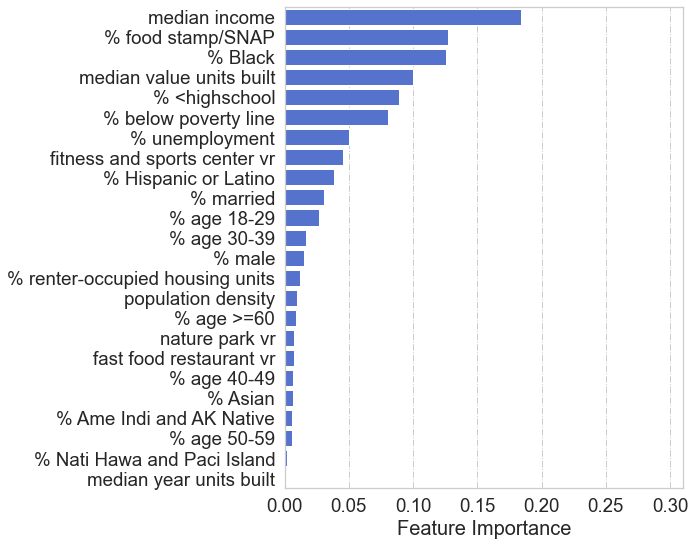

In [15]:
# Feature importance bar visualization (bar plot, this one I use)
df_complete_feaimp["mean"] = df_complete_feaimp.mean(axis = 1)
df_complete_feaimp1 = df_complete_feaimp.reset_index()
df_complete_feaimp2 = df_complete_feaimp1.sort_values(by = "mean", ascending = False)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.7)

ax = sns.barplot(y="feature", x="mean", data=df_complete_feaimp2, color = "royalblue")
plt.xlabel('Feature Importance', fontsize=20)
plt.ylabel('')
plt.xlim(0,0.31)
plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()
# plt.savefig("../02 Dataset/11 RF Important Figure/bar_feature_importance_BUF.png",dpi=300)

26.1
49.1
28.58499999999996
46.10937499999999


<Figure size 720x576 with 0 Axes>

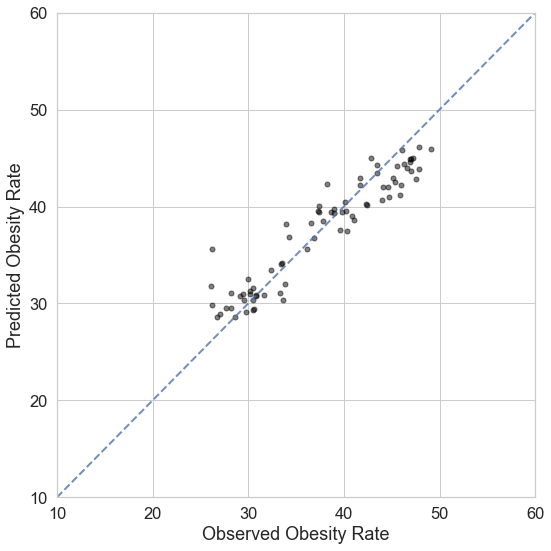

In [14]:
# Scatter-curve plot
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.5)

def prediction_scatter(true_label, prediction, lims, title):
    plt.figure(figsize=(8,8))
    scatter = plt.plot(true_label, prediction, "o", markersize=5, alpha=0.5, color="black")
    line = plt.plot(lims, lims, "b--",alpha=0.8, linewidth=2)
    plt.xlim(lims)
    plt.ylim(lims)
    plt.xlabel('Observed Obesity Rate')
    plt.ylabel('Predicted Obesity Rate')
    plt.title(title)
    
print(np.min(y_true))
print(np.max(y_true))
print(np.min(y_rf_complete_predict))
print(np.max(y_rf_complete_predict))

#scatter plot
lims = [10, 60]
prediction_scatter(y_true, y_rf_complete_predict, lims, "")
plt.tight_layout()
# plt.savefig("../RF_pred_origin_BUF.png",dpi=300)